<a href="https://colab.research.google.com/github/breakdq/experiments/blob/main/Reconoimiento_Tickets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Paso 1: Instalar dependencias
!apt-get install tesseract-ocr
!pip install pytesseract pillow opencv-python pandas openpyxl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [24]:
# Importación de librerías
import pytesseract
import cv2
import os
import re
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import drive

In [25]:
# Paso 3: Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Paso 4: Configurar rutas
ruta_carpeta = '/content/drive/MyDrive/tickets'  # Cambia esto por tu ruta
os.chdir(ruta_carpeta)

In [27]:
# Expresiones regulares para análisis de tickets
def procesar_ticket(texto):
    # Patrones regex mejorados
    apuesta_pattern = re.compile(r'^(.*?\d+\.?\d*[\s+-±][^\d]*)(?=\s*\d+\.\d{2,3}|$)', re.MULTILINE)
    cuota_pattern = re.compile(r'(\d+\.\d{2,3})(?=\s*$|\s*[A-Z])', re.MULTILINE)
    partido_pattern = re.compile(r'(.+?)\s+v(?:s|\.)?\s+(.+?)\s+(\d{2}/\d{2}/\d{4})')
    mercado_pattern = re.compile(r'(?:\d°\s*)?(?:tiempo|mapa|cuarto|set)?\s*[-–]?\s*(.*?)(?:\s*Perdida|\s*Ganada|$)', re.IGNORECASE)
    resultado_pattern = re.compile(r'(Perdida|Ganada)', re.IGNORECASE)
    monto_pattern = re.compile(r'[/x]\s*([$S])/?(\d+\.\d{2})')

    datos = {
        'archivo': None,
        'apuesta': None,
        'cuota': None,
        'equipo_local': None,
        'equipo_visitante': None,
        'fecha': None,
        'mercado': None,
        'resultado': None,
        'monto': None,
        'texto_extraido': texto
    }

    try:
        # Extraer datos
        if match := apuesta_pattern.search(texto):
            datos['apuesta'] = match.group(1).strip()

        if match := cuota_pattern.search(texto):
            datos['cuota'] = float(match.group(1))

        if match := partido_pattern.search(texto):
            datos['equipo_local'] = match.group(1).strip()
            datos['equipo_visitante'] = match.group(2).strip()
            datos['fecha'] = match.group(3)

        if match := mercado_pattern.search(texto):
            datos['mercado'] = match.group(1).strip()

        if match := resultado_pattern.search(texto):
            datos['resultado'] = match.group(1).upper()

        if match := monto_pattern.search(texto):
            datos['monto'] = float(match.group(2))

    except Exception as e:
        print(f"Error procesando texto: {str(e)}")

    return datos


Procesando: 1.PNG

Imagen original:


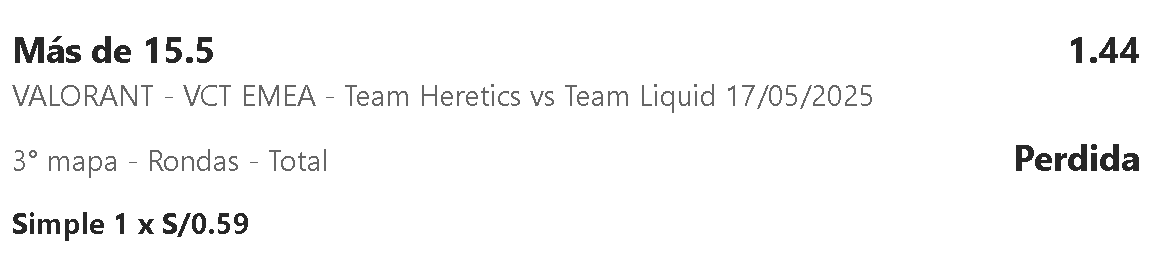


Imagen procesada (para OCR):


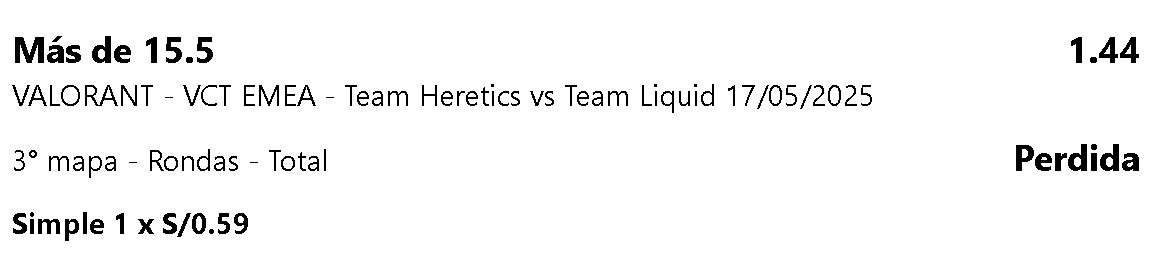


Texto extraído:
------------------------------
Mas de 15.5 1.44
VALORANT - VCT EMEA - Team Heretics vs Team Liquid 17/05/2025

3° mapa - Rondas - Total Perdida

Simple 1 x $/0.59


Datos estructurados:
------------------------------
ARCHIVO        : 1.PNG
APUESTA        : Mas de 15.5
CUOTA          : 1.44
EQUIPO_LOCAL   : VALORANT - VCT EMEA - Team Heretics
EQUIPO_VISITANTE: Team Liquid
FECHA          : 17/05/2025
MERCADO        : 3° mapa - Rondas - Total
RESULTADO      : PERDIDA
MONTO          : 0.59

Procesando: 2.PNG

Imagen original:


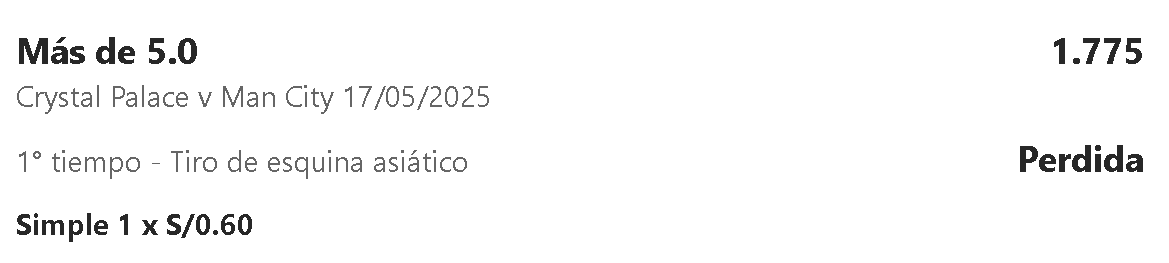


Imagen procesada (para OCR):


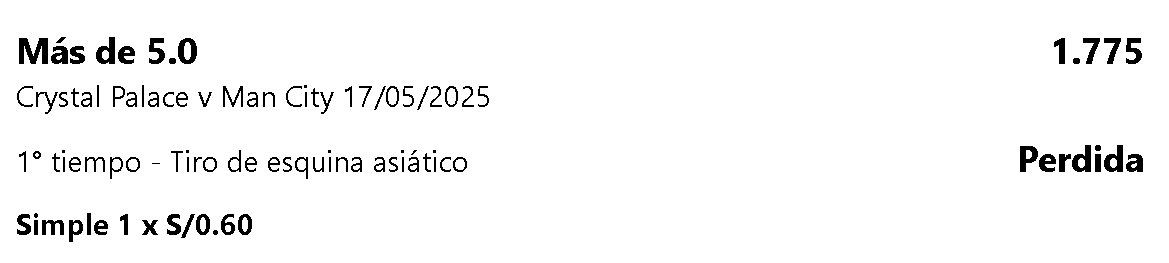


Texto extraído:
------------------------------
Mas de 5.0 1.775
Crystal Palace v Man City 17/05/2025

1° tiempo - Tiro de esquina asiatico Perdida

Simple 1 x $/0.60


Datos estructurados:
------------------------------
ARCHIVO        : 2.PNG
APUESTA        : Mas de 5.0
CUOTA          : 1.775
EQUIPO_LOCAL   : Crystal Palace
EQUIPO_VISITANTE: Man City
FECHA          : 17/05/2025
MERCADO        : 1° tiempo - Tiro de esquina asiatico
RESULTADO      : PERDIDA
MONTO          : 0.6

Procesando: 3.PNG

Imagen original:


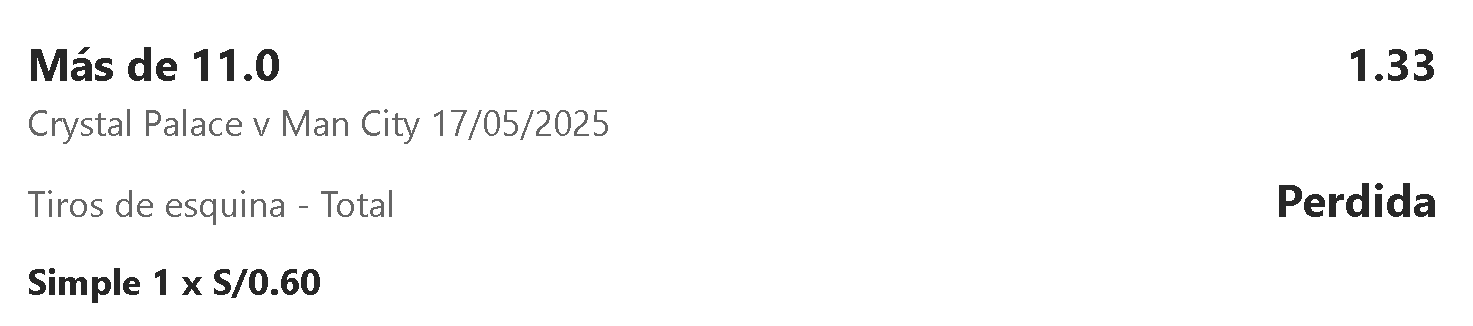


Imagen procesada (para OCR):


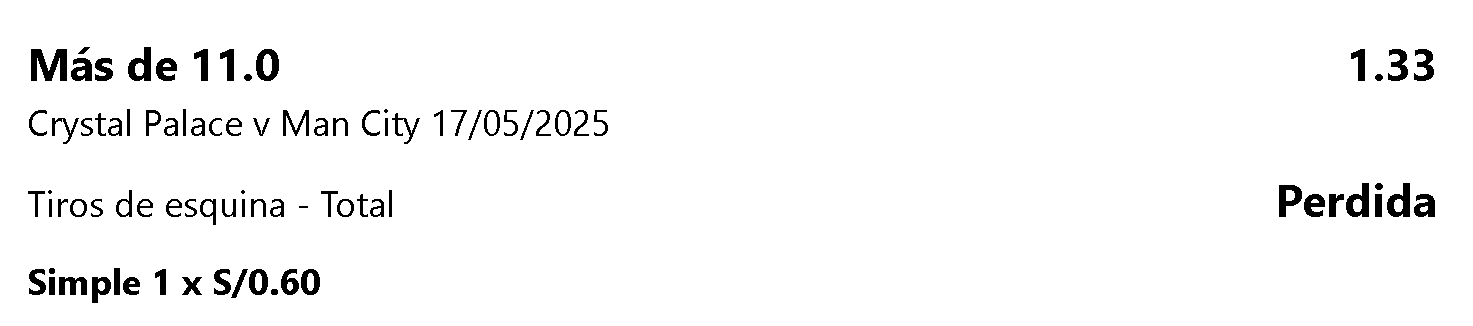


Texto extraído:
------------------------------
Mas de 11.0 1.33

Crystal Palace v Man City 17/05/2025
Perdida

Tiros de esquina - Total

Simple 1 x S/0.60


Datos estructurados:
------------------------------
ARCHIVO        : 3.PNG
APUESTA        : Mas de 11.0
CUOTA          : 1.33
EQUIPO_LOCAL   : Crystal Palace
EQUIPO_VISITANTE: Man City
FECHA          : 17/05/2025
MERCADO        : Crystal Palace v Man City 17/05/2025
RESULTADO      : PERDIDA
MONTO          : 0.6

Procesando: 4.PNG

Imagen original:


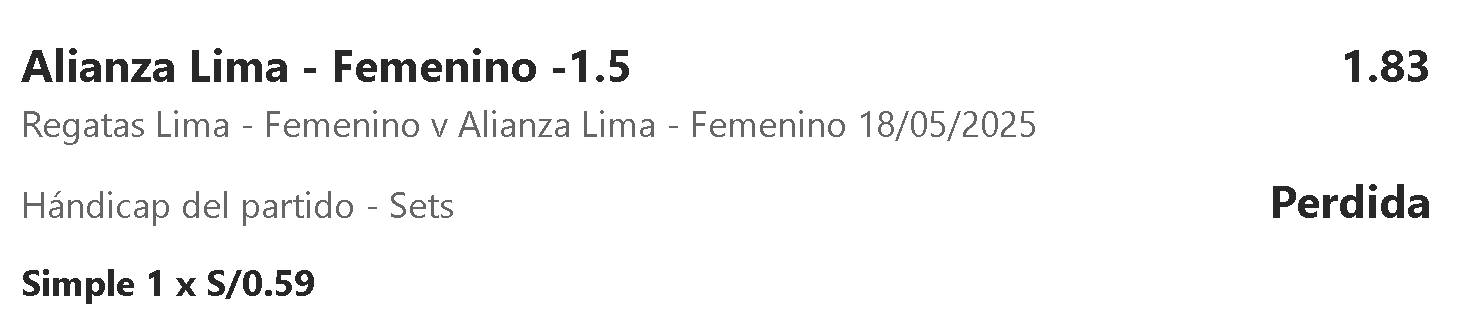


Imagen procesada (para OCR):


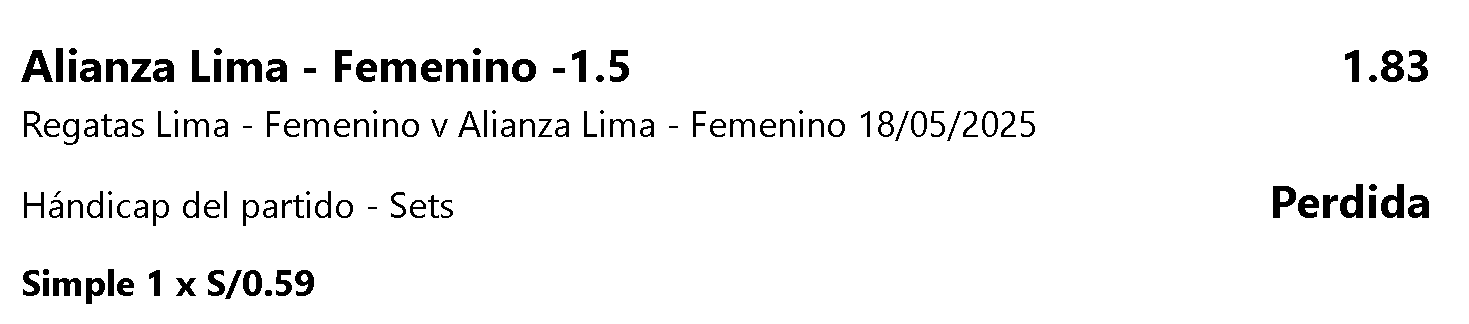


Texto extraído:
------------------------------
Alianza Lima - Femenino -1.5 1.83

Regatas Lima - Femenino v Alianza Lima - Femenino 18/05/2025
Handicap del partido - Sets Perdida
Simple 1 x S/0.59


Datos estructurados:
------------------------------
ARCHIVO        : 4.PNG
APUESTA        : Alianza Lima - Femenino -1.5
CUOTA          : 1.83
EQUIPO_LOCAL   : Regatas Lima - Femenino
EQUIPO_VISITANTE: Alianza Lima - Femenino
FECHA          : 18/05/2025
MERCADO        : Handicap del partido - Sets
RESULTADO      : PERDIDA
MONTO          : 0.59

Procesando: 5.PNG

Imagen original:


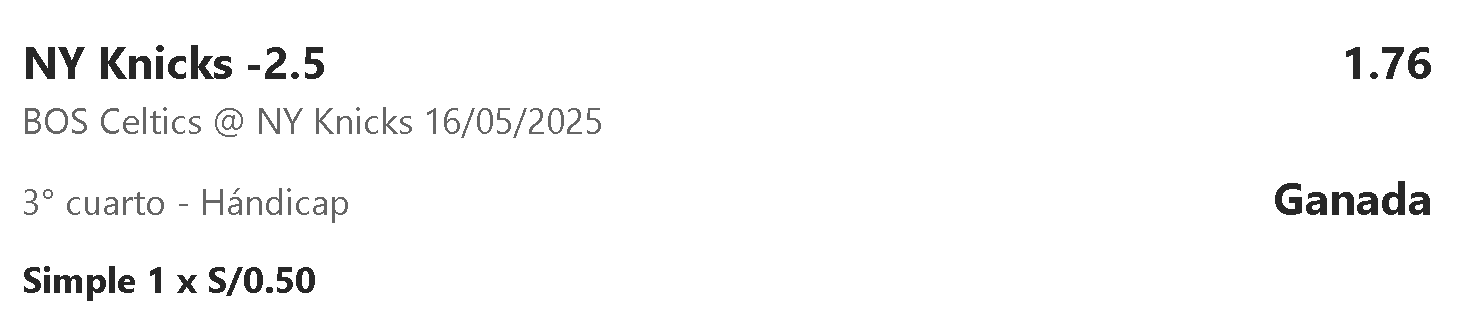


Imagen procesada (para OCR):


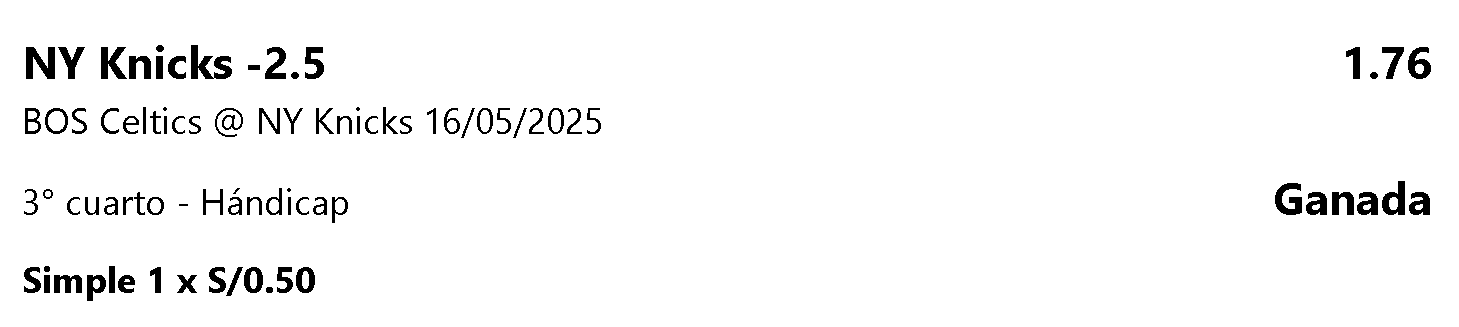


Texto extraído:
------------------------------
NY Knicks -2.5 1.76
BOS Celtics @ NY Knicks 16/05/2025

3° cuarto - Handicap Ganada

Simple 1 x S/0.50


Datos estructurados:
------------------------------
ARCHIVO        : 5.PNG
APUESTA        : NY Knicks -2.5
CUOTA          : 1.76
EQUIPO_LOCAL   : None
EQUIPO_VISITANTE: None
FECHA          : None
MERCADO        : 3° cuarto - Handicap
RESULTADO      : GANADA
MONTO          : 0.5

Procesando: 6.PNG

Imagen original:


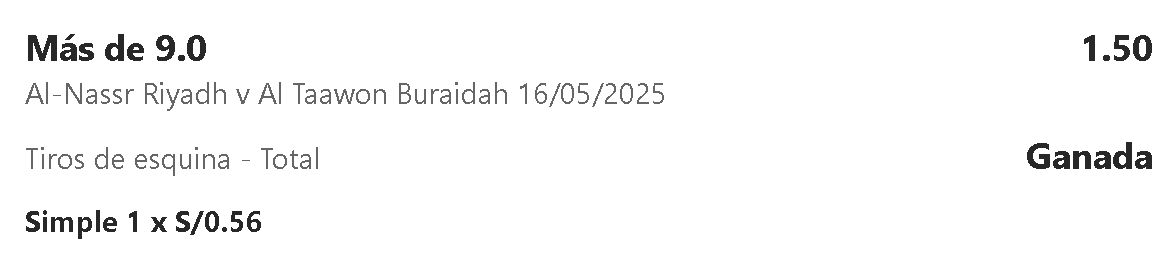


Imagen procesada (para OCR):


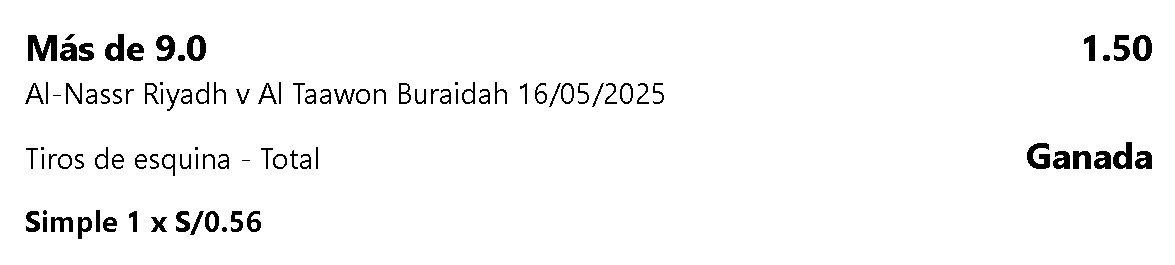


Texto extraído:
------------------------------
Mas de 9.0 1.50
Al-Nassr Riyadh v Al Taawon Buraidah 16/05/2025

Tiros de esquina - Total Ganada

Simple 1 x $/0.56


Datos estructurados:
------------------------------
ARCHIVO        : 6.PNG
APUESTA        : Mas de 9.0
CUOTA          : 1.5
EQUIPO_LOCAL   : Al-Nassr Riyadh
EQUIPO_VISITANTE: Al Taawon Buraidah
FECHA          : 16/05/2025
MERCADO        : Tiros de esquina - Total
RESULTADO      : GANADA
MONTO          : 0.56

Procesando: 7.PNG

Imagen original:


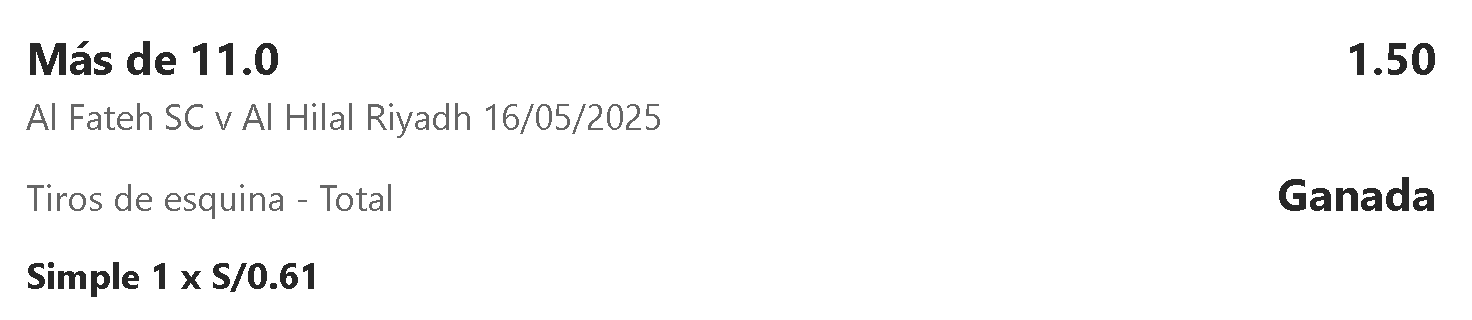


Imagen procesada (para OCR):


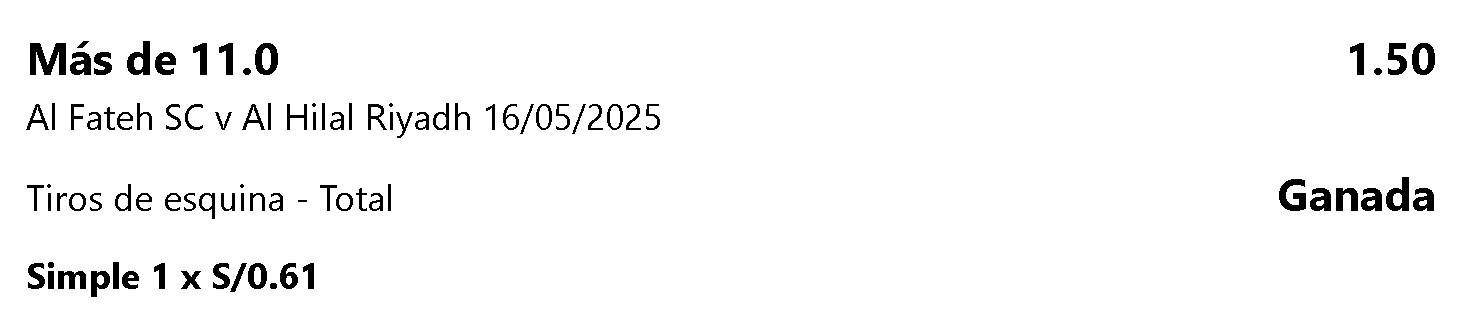


Texto extraído:
------------------------------
Mas de 11.0 1.50
Al Fateh SC v Al Hilal Riyadh 16/05/2025

Tiros de esquina - Total Ganada

Simple 1 x S/0.61


Datos estructurados:
------------------------------
ARCHIVO        : 7.PNG
APUESTA        : Mas de 11.0
CUOTA          : 1.5
EQUIPO_LOCAL   : Al Fateh SC
EQUIPO_VISITANTE: Al Hilal Riyadh
FECHA          : 16/05/2025
MERCADO        : Tiros de esquina - Total
RESULTADO      : GANADA
MONTO          : 0.61

Procesando: 8.PNG

Imagen original:


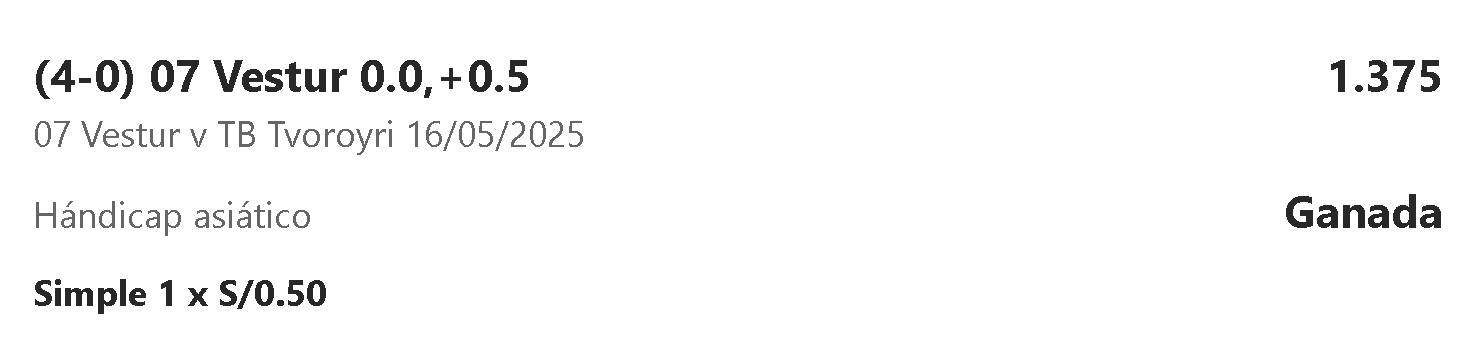


Imagen procesada (para OCR):


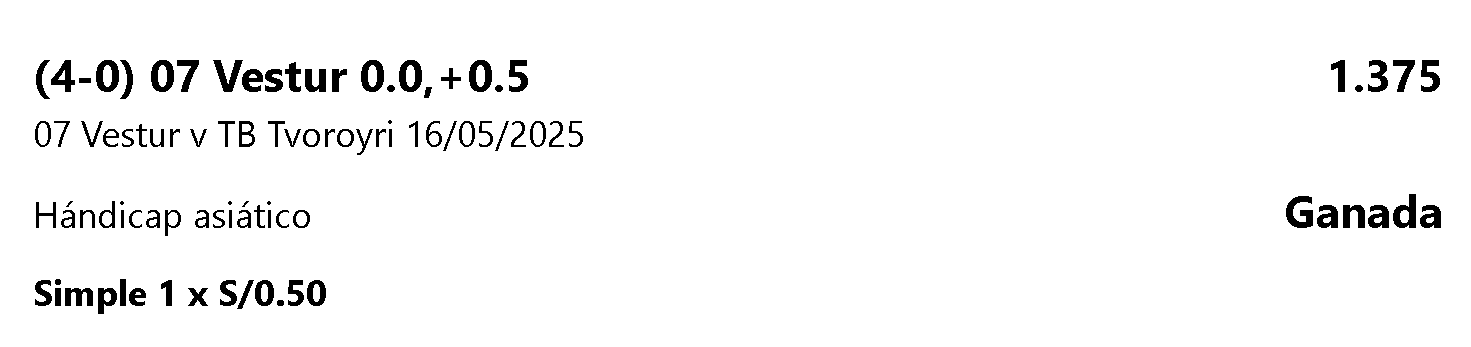


Texto extraído:
------------------------------
(4-0) 07 Vestur 0.0,+0.5 1.375
07 Vestur v TB Tvoroyri 16/05/2025

Handicap asiatico Ganada

Simple 1 x S/0.50


Datos estructurados:
------------------------------
ARCHIVO        : 8.PNG
APUESTA        : (4-0) 07 Vestur 0.0,+0.5
CUOTA          : 1.375
EQUIPO_LOCAL   : 07 Vestur
EQUIPO_VISITANTE: TB Tvoroyri
FECHA          : 16/05/2025
MERCADO        : Handicap asiatico
RESULTADO      : GANADA
MONTO          : 0.5

Procesando: 9.PNG

Imagen original:


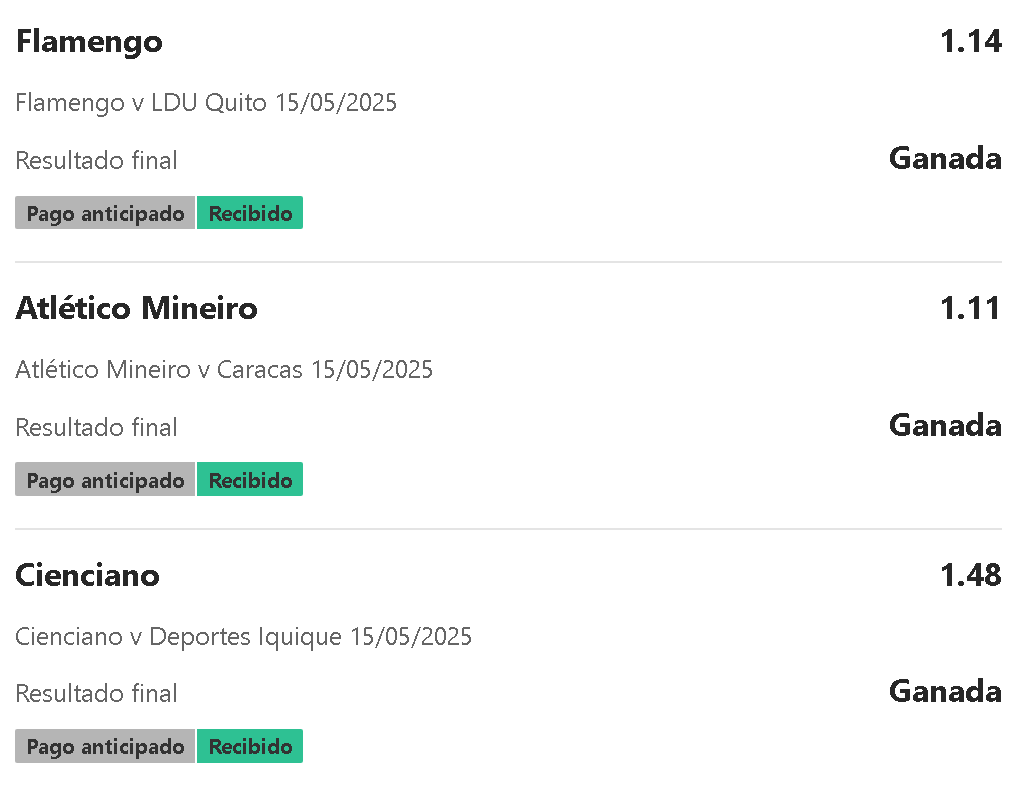


Imagen procesada (para OCR):


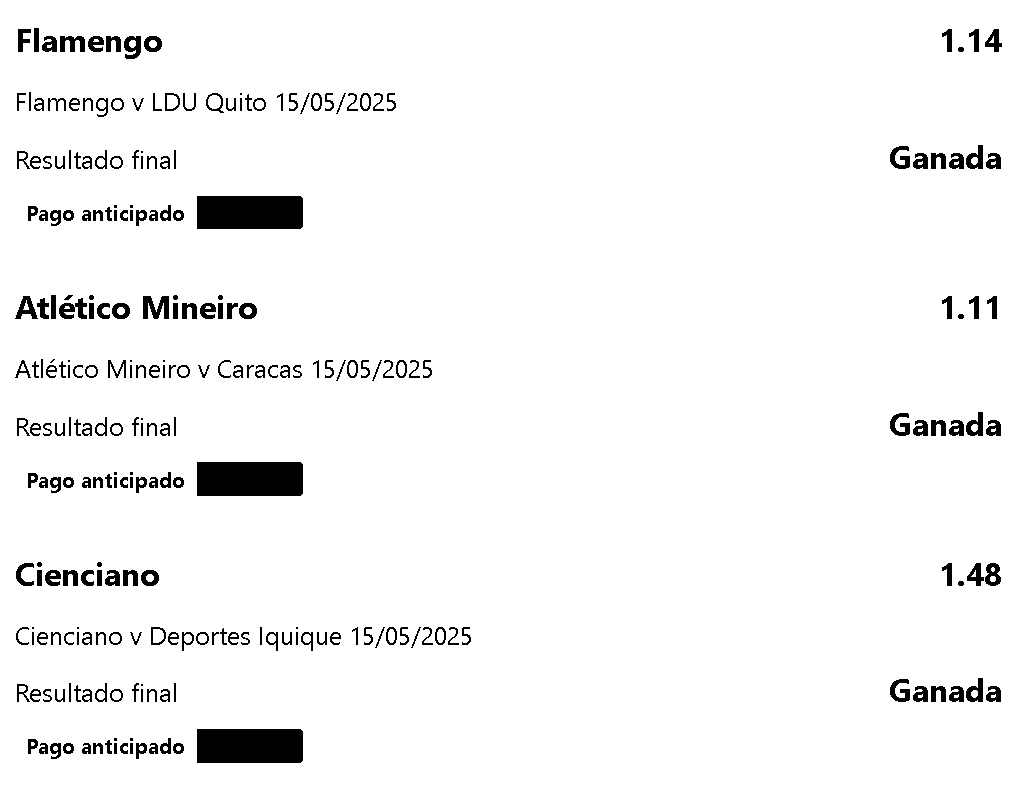


Texto extraído:
------------------------------
Flamengo
Flamengo v LDU Quito 15/05/2025

Resultado final

Pago anticipado |

Atlético Mineiro
Atlético Mineiro v Caracas 15/05/2025

Resultado final

Pago anticipado |

Cienciano
Cienciano v Deportes Iquique 15/05/2025

Resultado final

Pago anticipado |

1.14

Ganada

1.11

Ganada

1.48

Ganada


Datos estructurados:
------------------------------
ARCHIVO        : 9.PNG
APUESTA        : Flamengo v LDU Quito 15/05/2025

Resultado final

Pago anticipado |

Atlético Mineiro
CUOTA          : 1.14
EQUIPO_LOCAL   : Flamengo
EQUIPO_VISITANTE: LDU Quito
FECHA          : 15/05/2025
MERCADO        : 1.14
RESULTADO      : GANADA
MONTO          : None


RESUMEN DE PROCESAMIENTO


,archivo,apuesta,cuota,equipo_local,equipo_visitante,fecha,mercado,resultado,monto
0,1.PNG,Mas de 15.5,1.440,VALORANT - VCT EMEA - Team Heretics,Team Liquid,17/05/2025,3° mapa - Rondas - Total,PERDIDA,0.59
1,2.PNG,Mas de 5.0,1.775,Crystal Palace,Man City,17/05/2025,1° tiempo - Tiro de esquina asiatico,PERDIDA,0.60
2,3.PNG,Mas de 11.0,1.330,Crystal Palace,Man City,17/05/2025,Crystal Palace v Man City 17/05/2025,PERDIDA,0.60
3,4.PNG,Alianza Lima - Femenino -1.5,1.830,Regatas Lima - Femenino,Alianza Lima - Femenino,18/05/2025,Handicap del partido - Sets,PERDIDA,0.59
4,5.PNG,NY Knicks -2.5,1.760,None,None,None,3° cuarto - Handicap,GANADA,0.50
5,6.PNG,Mas de 9.0,1.500,Al-Nassr Riyadh,Al Taawon Buraidah,16/05/2025,Tiros de esquina - Total,GANADA,0.56
6,7.PNG,Mas de 11.0,1.500,Al Fateh SC,Al Hilal Riyadh,16/05/2025,Tiros de esquina - Total,GANADA,0.61
7,8.PNG,"(4-0) 07 Vestur 0.0,+0.5",1.375,07 Vestur,TB Tvoroyri,16/05/2025,Handicap asiatico,GANADA,0.50
8,9.PNG,Flamengo v LDU Quito 15/05/2025\n\nResultado f...,1.140,Flamengo,LDU Quito,15/05/2025,1.14,GANADA,NaN



Resultados guardados en: /content/drive/MyDrive/tickets/resultados_apuestas.csv


In [28]:
# Procesamiento de imágenes y extracción estructurada
resultados = []

for nombre_archivo in os.listdir():
    if nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        try:
            print(f"\n{'='*50}")
            print(f"Procesando: {nombre_archivo}")
            print(f"{'='*50}")

            # 1. Leer imagen
            img = cv2.imread(nombre_archivo)
            if img is None:
                print(f"Error: No se pudo leer la imagen {nombre_archivo}")
                continue

            # 2. Preprocesamiento
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

            # 3. Mostrar imagen original y procesada
            print("\nImagen original:")
            cv2_imshow(img)
            print("\nImagen procesada (para OCR):")
            cv2_imshow(thresh)

            # 4. Extraer texto con OCR
            texto = pytesseract.image_to_string(thresh)
            print("\nTexto extraído:")
            print("-"*30)
            print(texto)

            # 5. Procesar texto con regex
            datos_ticket = procesar_ticket(texto)
            datos_ticket['archivo'] = nombre_archivo
            resultados.append(datos_ticket)

            # 6. Mostrar resultados estructurados
            print("\nDatos estructurados:")
            print("-"*30)
            for k, v in datos_ticket.items():
                if k != 'texto_extraido':
                    print(f"{k.upper():<15}: {v}")

            # 7. Guardar resultados en CSV
            df = pd.DataFrame(resultados)
            df.to_csv('resultados_apuestas.csv', index=False, encoding='utf-8')

        except Exception as e:
            print(f"Error procesando {nombre_archivo}: {str(e)}")

# Resultados finales
print("\n\nRESUMEN DE PROCESAMIENTO")
print("="*50)
if resultados:
    df_final = pd.DataFrame(resultados)
    display(df_final.drop(columns=['texto_extraido']))
    print(f"\nResultados guardados en: {os.path.join(ruta_carpeta, 'resultados_apuestas.csv')}")
else:
    print("No se procesaron archivos o no se encontraron imágenes válidas")

In [29]:
from google.colab import files

# 7. Guardar resultados en CSV
df = pd.DataFrame(resultados)
df.to_csv('resultados_apuestas.csv', index=False, encoding='utf-8')

# --- NUEVO: Descargar CSV ---
if os.path.exists('resultados_apuestas.csv'):
    files.download('resultados_apuestas.csv')
    print("\n¡CSV descargado exitosamente!")
else:
    print("\nError: No se encontró el archivo CSV")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¡CSV descargado exitosamente!


In [30]:
# Primero instala la librería necesaria
!pip install gspread pandas

MessageError: Error: credential propagation was unsuccessful

In [34]:
!pip install gspread pandas gspread-dataframe
!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2

import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import auth
import pandas as pd
from google.auth import default


❌ Error al guardar en Sheets: <Response [404]>
⚠️ Creando respaldo en CSV...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:

# Autenticación mejorada
def authenticate_gspread():
    try:
        # Intenta con el método tradicional de Colab
        auth.authenticate_user()
        gc = gspread.authorize(GoogleCredentials.get_application_default())
        return gc
    except:
        # Fallback al método de credenciales por defecto
        creds, _ = default()
        return gspread.authorize(creds)

gc = authenticate_gspread()



In [38]:
# Configuración
SPREADSHEET_ID = "1gvRkSOgZQ07hZia9ICmrxfAaJayEF62i-o0zKYAhW64"  # Reemplaza con tu ID real
WORKSHEET_NAME = "Resultados"

def save_to_sheets(df, spreadsheet_id, worksheet_name):
    try:
        # Abrir por ID directo (más confiable que por nombre)
        spreadsheet = gc.open_by_key(spreadsheet_id)

        try:
            worksheet = spreadsheet.worksheet(worksheet_name)
            # Limpiar hoja existente
            worksheet.clear()
        except gspread.WorksheetNotFound:
            worksheet = spreadsheet.add_worksheet(title=worksheet_name, rows=df.shape[0]+1, cols=df.shape[1]+2)

        # Escribir datos
        set_with_dataframe(worksheet, df)

        print("✅ Datos guardados exitosamente en Google Sheets")
        print(f"📊 URL: https://docs.google.com/spreadsheets/d/{spreadsheet_id}")
        return True

    except Exception as e:
        print(f"❌ Error al guardar en Sheets: {e}")
        return False

# Uso con tus datos
if not save_to_sheets(df_final, SPREADSHEET_ID, WORKSHEET_NAME):
    print("⚠️ Creando respaldo en CSV...")
    df_final.to_csv('resultados_apuestas.csv', index=False)
    from google.colab import files
    files.download('resultados_apuestas.csv')

✅ Datos guardados exitosamente en Google Sheets
📊 URL: https://docs.google.com/spreadsheets/d/1gvRkSOgZQ07hZia9ICmrxfAaJayEF62i-o0zKYAhW64
